# HW8 (70 points total)

# Problem 1:   Forwarding the mail (8 points)

There's just one email address for *Handy Home Helpers*, but there are three kinds of things the business does, each of which is handled by a different associate.  Alice handles bathroom work - clogged toilets and drains, mold removal, leaks.  Bob handles HVAC work - air conditioning and heating, mostly.  Chun does appliance repair:  dishwashers, washers, driers.  They'd like to have a script that can forward emails sent to the main address to the right associate.

Write a function *forward(text, wv)* that reads the email *text* and returns the email address of the associate to whom the email should be forwarded ("alice@hhh.com", "bob@hhh.com", or "chun@hhh.com").  To do this, your code should create a vector for each associate that represents their interests overall, and return the email of the associate whose vector is closest in angle to the vector of the email.  Use *find_avg_word_vector()* and *find_cosine()* from lecture, and make use of the provided topic strings.  Break ties among the associates alphabetically, so for example Alice gets the mail if she's tied for closest.

In [ ]:
alice = 'bathrooom toilet clogged drain mold leaks'
bob = 'air-conditioning AC heating cooling vents air'
chun = 'appliances dishwashers washer drier repair'

In [ ]:
# May need to !pip install gensim if working locally
import gensim
import gensim.downloader as api

wv = api.load('word2vec-google-news-300')

[==================================================] 100.0% 1662.8/1662.8MB downloaded


In [ ]:
# TODO:  get relevant functions from lecture notes
import nltk # natural language processing, old school method
from nltk.tokenize import word_tokenize
nltk.download('punkt')
word_tokenize("""bathrooom toilet clogged drain mold leaks
 air-conditioning AC heating cooling vents air
 appliances dishwashers washer drier repair""")

import numpy as np
import pandas as pd

# Example of unrelated word angle cosine
def find_cosine(vec1, vec2):
  # Scale vectors to both have unit length
  unit_vec1 = vec1/np.linalg.norm(vec1)
  unit_vec2 = vec2/np.linalg.norm(vec2)
  # The dot product of unit vectors gives the cosine of their angle
  return np.dot(unit_vec1,unit_vec2)


# Turn a sentence into a vector by averaging the vectors of its words.
def find_avg_vector(txt, embedding):
  words = word_tokenize(txt)
  vec_sum = None
  count = 0
  for word in words:
    if word in embedding:
      count += 1
      if vec_sum is not None:
        vec_sum += embedding[word]
      else:
        # The embeddings are read-only unless you copy them
        vec_sum = embedding[word].copy()
  if vec_sum is None:
    return pd.Series(np.zeros((300,)))  # Treat no word found in embedding as zero vector
  return pd.Series(vec_sum/count)


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
# TODO: forward()
def forward(text, wv):
  # reads the text and figures out which person the email should be forwarded to
  alice = 'bathrooom toilet clogged drain mold leaks'
  bob = 'air-conditioning AC heating cooling vents air'
  chun = 'appliances dishwashers washer drier repair'

  # create a vector for each associate that represents their interests overall
  # do this with find avg vector
  vector_alice = find_avg_vector(alice, wv)
  vector_bob = find_avg_vector(bob, wv)
  vector_chun = find_avg_vector(chun, wv)
  vector_email = find_avg_vector(text, wv)

  # Use find cosine to find the correlation between two texts
  corr_alice = find_cosine(vector_alice, vector_email) # corr stands for correlation
  corr_bob = find_cosine(vector_bob, vector_email)
  corr_chun = find_cosine(vector_chun, vector_email)

  # Find the greatest correlation and return the person needed for the job!!
  if corr_alice > corr_bob and corr_alice > corr_chun:
    return ('alice@hhh.com')
  if corr_bob > corr_alice and corr_bob > corr_chun:
    return ('bob@hhh.com')
  if corr_chun > corr_alice and corr_chun > corr_bob:
    return ('chun@hhh.com')
  # Break ties among the associates alphabetically, so for example Alice gets the mail if she's tied for closest.
  if corr_alice == corr_bob or corr_alice == corr_chun:
    return ('alice@hhh.com')
  if corr_bob == corr_chun:
    return ('bob@hhh.com')

In [ ]:
# Test1: Expect 'alice@hhh.com'
test1 = "Tried a plunger and no luck.  Help!"
forward(test1, wv)

'alice@hhh.com'

In [ ]:
#Test2: Expect 'bob@hhh.com'
test2 = "So hot - I think the thermostat is busted..."
forward(test2, wv)

'bob@hhh.com'

In [ ]:
#Test3: Expect 'chun@hhh.com'
test3 = "I need to fix my dishwasher - suds flood the kitchen every time I run it"
forward(test3, wv)

'chun@hhh.com'

# Problem 2:  Price of Milk Interpolation (7 points)

The following y values represent the average price of a gallon of milk for each year. (Source: https://www.usinflationcalculator.com/inflation/milk-prices-adjusted-for-inflation/) Perform linear regression with scikit-learn's LinearRegression class.  Then plot the points alongside the linear fit.  And finally, make a prediction for 2023 with this linear model.

In [ ]:
import numpy as np
x = np.linspace(1995, 2021, 27)
y = [2.48, 2.62, 2.61, 2.70, 2.84,
     2.78, 2.88, 2.76, 2.76, 3.16, 3.19, 3.08, 3.50, 3.80, 3.11,
     3.26, 3.57, 3.49, 3.46, 3.69, 3.42, 3.20, 3.23, 2.90, 3.04,
     3.32, 3.55]

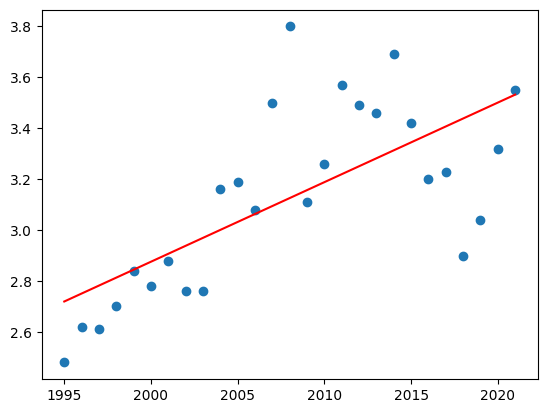

In [ ]:

from sklearn.linear_model import LinearRegression

linear_model = LinearRegression()
x = x.reshape(-1,1) # reshapes data into desired shape, -1 is make it fit, 1 is just 1 column
linear_model.fit(x,y)
y_predict = linear_model.predict(x)

# Visualize the points:
import matplotlib.pyplot as plt
plt.plot(x,y,'o')
plt.plot(x,y_predict,'r')
plt.show() # scatterplot

In [ ]:
# TODO: Prediction for 2023
# https://www.geeksforgeeks.org/python-linear-regression-using-sklearn/#
x = np.array([[2023]])
x = x.reshape(-1 ,1)
y_predict = linear_model.predict(x)
print(y_predict)

[3.59479039]


# Problem 3:  Cumulative problems (35 points)

a (20 points):  Suppose we have a matrix where the $m$ rows represent different observations and the $n$ columns represent different features of the same example.  We also have an $(m-v)$-element 1D numpy array of labels for the training examples, 0 or 1, and a $v$ element numpy array with labels for the validation examples (which all come after the training examples in the feature matrix).  We'd like to train a bunch of decision trees, checking what happens when we train with all possible combinations of the following constructor parameters:  max_depth (2, 10, or None), min_samples_leaf (1 or 2), and max_features ('sqrt' or None).  The best tree is the one with the highest accuracy on the validation set.  Write a function find_best_params() that tries all combinations of the features and values described above.  Return the validation accuracy of the best tree, the max_depth of the best tree, the min_samples_leaf of the best tree, and the max_features of the best tree.

In [ ]:
import numpy as np

# Small example for basic testing - things should run
examples_example = np.array([[1, 2, 3], [-1, -2, -3], [3, 4, -2], [-6, 4, 1], [1, 2, -4], [1,1,1]])
train_labels_example = np.array([1, 0, 1, 0])
validation_labels_example = ([0, 1])

# Bigger example where params may matter
from sklearn.datasets import make_classification
big_examples, big_labels = make_classification(n_samples=200, n_features=20, n_classes=2, shuffle=True, random_state=0)
big_labels_train = big_labels[:150]
big_labels_valid = big_labels[150:]

In [ ]:
# TODO: find_best_params()
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

def find_best_params(example, train_label, validation_label):
  # Return the validation accuracy, max depth, min samples leaf, and max features of the best tree

  # define some stuff here
  max_depth = [2, 10, None]
  min_samples_leaf = [1, 2]
  max_features = ['sqrt', None]
  best_score = 0
  best_depth = None
  best_sample = None
  best_feature = None

  # define data train, test - label train, test
  data_train, label_train = example[:len(train_label)], train_label #
  data_test, label_test = example[len(train_label):], validation_label

  # iterate through all the possibilities
  for depth in max_depth:
    for sample in min_samples_leaf:
      for feature in max_features:
        dtree = DecisionTreeClassifier(criterion="entropy", max_depth = depth, min_samples_leaf = sample, max_features = feature, random_state=0)
        dtree.fit(data_train, label_train)
        score = dtree.score(data_train, label_train) # training or testing data
        if score > best_score:
          best_score = score
          best_depth = depth
          best_sample = sample
          best_feature = feature
  return (f"Best score: {best_score}, Depth: {best_depth}, Sample: {best_sample}, Feature: {best_feature}")



In [ ]:
# With random_state = 0 passed to DecisionTreeClassifier,
# accuracy 0.5 - other parameter values depend on order of evaluation
find_best_params(examples_example, train_labels_example, validation_labels_example)

'Best score: 1.0, Depth: 2, Sample: 1, Feature: None'

In [ ]:
# With random_state = 0 passed to DecisionTreeClassifier,
# Accuracy of 0.9, max_depth varies, min_samples_leaf 1, max_features None
find_best_params(big_examples, big_labels_train, big_labels_valid)

b (15 points):  You are analyzing a long document that happens to mention who reports to who in an organization - for example, "Mary reports to Alice".  Write a function print_reports() that analyzes such a string, pulling out all such relationships.  (You can assume the document literally says "X reports to Y" with X and Y being the names.). Then print for each person the number of "direct reports" that person has, that is, the number of people reporting to them.  (See the tests for examples).  Return the total number of people in the organization.

In [ ]:
import re
def print_reports(text):
  # Returns the report count and total # of ppl in organizations
  person_dictionary = {}
  person_list = []
  person_count = 0

  # use regular expressions to filter out stuff
  # for the direct report count
  pattern1 = r"reports to [A-Z][a-z]+"
  result1 = re.findall(pattern1, text)

  # for the person count
  pattern2 = pattern2 = r"(?<=reports to )[A-Z][a-z]+|[A-Z][a-z]+(?= reports to)"
  result2 = re.findall(pattern2, text)

  # slice through pattern 1 and append to dictionary
  for result in result1:
    result = result[11:]
    if result not in person_dictionary:
      person_dictionary[result] = 1
    else:
      person_dictionary[result] += 1 # add count of 1 to the dictionary
  print(person_dictionary)

  # iterate through result to account for duplicates
  for person in result2:
    if person not in person_list:
      person_list.append(person)
      person_count += 1
  return (f"Total # of people: {person_count}")

In [ ]:
text = "Mary reports to Sally, Sally reports to Bob, Bob reports to Alice, \
        but also Yilan reports to Sally, and Medhavi reports to Alice"
# Expect Sally 2, Mary 0, Bob 1, Yilan 0, Medhavi 0, Alice 2
# (in no particular order) and return 6
print_reports(text)

{'Sally': 2, 'Bob': 1, 'Alice': 2}


'Total # of people: 6'

In [ ]:
# Don't crash on this
text = "This document has no information"
print_reports(text)

{}


'Total # of people: 0'

In [ ]:
# Expect Alice 4, all others 0, total people 5
text = "Bob reports to Alice and Dominique reports to Alice, \
        not to mention Jason reports to Alice and Clive reports to Alice"
print_reports(text)

{'Alice': 4}


'Total # of people: 5'

# Problem 4:  Miniproject (20 points + up to 15 points extra credit)

This problem has an open-ended component.  You can get full credit by doing the problem set with the *suggested* data set (spotify.csv), but you can get **extra credit** by doing it with a different dataset that you have found on the Internet (for example, on Kaggle.com) and/or doing more analysis than required.  You also have the opportunity to get **additional extra credit applied to your final exam grade** if you are selected to give a lightning talk on Dec 6 about what you found with this project.  The lightning talk is only possible if you chose your own dataset.

The suggested dataset, guaranteed to have minimal data cleaning but not eligible for extra credit, is the file spotify.csv, which originally came from https://www.kaggle.com/datasets/maharshipandya/-spotify-tracks-dataset but which you can now find on Blackboard where you found this assignment.  (For a description of what its features mean, see https://developer.spotify.com/documentation/web-api/reference/get-audio-features.)  We'll assume in the instructions that if you're using that dataset, you're trying to predict genre from the other numerical features.

If you choose your own dataset, pick one where you think it would be interesting but feasible to predict some variable in the dataset from the others.  If it needs a lot of "cleaning" to be usable, you will get extra credit, but you could also consider looking at a few datasets and picking one that seems somewhat close to directly usable.  (You do *not* need high accuracy in your classifier to get full or extra credit; problems like predicting stock prices from their histories are inherently harder than classifying country from latitude and longitude, for example.)

a 5 points + 7 points EC) Load the dataset as a DataFrame and prepare it for machine learning.  In the spotify.csv case, we suggest using a sklearn.preprocessing.LabelEncoder to turn the target column into numerical classes; see examples in the documentation (https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html).  You should also fix any columns that look basically numerical, but for some reason were processed as strings instead; but the suggested dataset doesn't have any of these.

If you are cleaning a novel dataset, you may get extra credit here if it takes more work than the spotify dataset to clean.

Suggested dataset EC:  For the suggested dataset, you will get better results if you limit the target genres to four easily distinguished categories, such as 'acoustic', 'dance', 'grunge', and 'show-tunes'.  You can use .unique() to see all the categories available in this column.  Choosing your own 4 categories from unique() is worth 1 point of extra credit.  Limiting the classes like this is otherwise optional.

In [ ]:
# I am basing my project based off of the 2020 US election
# not much data for current election
from google.colab import files

uploaded = files.upload()

Saving US_Election_dataset_v1.csv to US_Election_dataset_v1.csv


In [ ]:
# cut out the duplicate column for county
import pandas as pd
import numpy as np
df = pd.read_csv('US_Election_dataset_v1.csv', index_col = 'county')
df = df.drop(columns=['Unnamed: 0'])

# Remove the percentages and commas in the columns
columns_percent_clean = ['Population with less than 9th grade education',
       'Population with 9th to 12th grade education, no diploma',
       'High School graduate and equivalent', 'Some College,No Degree',
       'Associates Degree', 'Bachelors Degree',
       'Graduate or professional degree']
column_comma_clean = ['Median income (dollars)', 'Mean income (dollars)']
percentage_clean = ['Hispanic or Latino percentage', 'NH-White percentage',
       'NH-Black percentage',
       'NH-American Indian and Alaska Native percentage',
       'NH-Asian percentage',
       'NH-Native Hawaiian and Other Pacific Islander percentage',
       'NH-Some Other Race percentage', 'NH-Two or More Races percentage',
       'Percentage engaged in Management, business, science, and arts occupations',
       'Percentage engaged in Service Occupations',
       'Percentage engaged in Sales and Office',
       'Percentage engaged in Resources and Construction',
       'Percentage engaged in Transportation'] # the word percentage is too big!
# Loop through the columns to clean them
for column in columns_percent_clean:
    # Remove any existing percent signs
    df[column] = df[column].str.replace('%', '').astype(float)
for column in df.columns:
  df[column] = df[column].replace('-', np.nan)
for column in column_comma_clean:
  # Remove any existing commas
  df[column] = df[column].str.replace(',', '').astype(float)
# Append the percent sign to the column name itself
# to prevent confusion
df.rename(columns=lambda x: x + ' %' if x in columns_percent_clean else x, inplace=True) # needed AI for this

# replace percentage with %
df.rename(columns=lambda x: x.replace('percentage', '%') if x in percentage_clean else x, inplace=True)
df.rename(columns=lambda x: x.replace('Percentage', '%') if x in percentage_clean else x, inplace=True)
# df[['Median income (dollars)', 'Mean income (dollars)']].head() # debugging
#df.head() # debugging
#print(df.columns) # debugging
print(df.dtypes) # debugging

state                                                                object
2020 Democrat vote raw                                                int64
2020 Democrat vote %                                                float64
2020 Republican vote raw                                              int64
2020 Republican vote %                                              float64
2020 other vote raw                                                   int64
2020 other vote %                                                   float64
Population with less than 9th grade education %                     float64
Population with 9th to 12th grade education, no diploma %           float64
High School graduate and equivalent %                               float64
Some College,No Degree %                                            float64
Associates Degree %                                                 float64
Bachelors Degree %                                                  float64
Graduate or 

In [ ]:
# Prepare the dataset for machine learning
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for column in df.columns:
  df[column] = le.fit_transform(df[column])

In [ ]:
print(df.columns)

Index(['state', '2020 Democrat vote raw', '2020 Democrat vote %',
       '2020 Republican vote raw', '2020 Republican vote %',
       '2020 other vote raw', '2020 other vote %',
       'Population with less than 9th grade education %',
       'Population with 9th to 12th grade education, no diploma %',
       'High School graduate and equivalent %', 'Some College,No Degree %',
       'Associates Degree %', 'Bachelors Degree %',
       'Graduate or professional degree %', 'Gini Index',
       'Median income (dollars)', 'Mean income (dollars)', 'Area in square Km',
       'Density per square km', 'Total Population', 'Hispanic or Latino %',
       'NH-White %', 'NH-Black %', 'NH-American Indian and Alaska Native %',
       'NH-Asian %', 'NH-Native Hawaiian and Other Pacific Islander %',
       'NH-Some Other Race %', 'NH-Two or More Races %',
       '% engaged in Management, business, science, and arts occupations',
       '% engaged in Service Occupations', '% engaged in Sales and Office

b, 7 points) Try predicting your target variable using a RandomForestClassifier from scikit-learn, with all the other numerical features in the dataset as your features.  You can create a dataframe that includes just your numeric features with df.select_dtypes(include='number'), and drop your target (to-be-predicted) column from your features if you need to with df = df.drop(columns=['target']).  (The suggested dataset should also drop the first 'Unnamed' column - that row number predicts the genre number pretty well in that dataset!)  Use a train-test split with 10% of the data in the test set, and evaluate the accuracy on the test set.

In [ ]:
# RANDOM FOREST REGRESSOR
# Democrat regressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import numpy as np

# split into features and target variables
features = df[['Population with less than 9th grade education %',
       'Population with 9th to 12th grade education, no diploma %',
       'High School graduate and equivalent %', 'Some College,No Degree %',
       'Associates Degree %', 'Bachelors Degree %',
       'Graduate or professional degree %', 'Gini Index',
       'Median income (dollars)', 'Mean income (dollars)', 'Area in square Km',
       'Density per square km', 'Total Population', 'Hispanic or Latino %',
       'NH-White %', 'NH-Black %', 'NH-American Indian and Alaska Native %',
       'NH-Asian %', 'NH-Native Hawaiian and Other Pacific Islander %',
       'NH-Some Other Race %', 'NH-Two or More Races %',
       '% engaged in Management, business, science, and arts occupations',
       '% engaged in Service Occupations', '% engaged in Sales and Office',
       '% engaged in Resources and Construction',
       '% engaged in Transportation']]
labels = df[['2020 Democrat vote %', '2020 Republican vote %']]
# Predict the target variable with random forest classifier
features_train, features_test, labels_train, labels_test = \
  train_test_split(features, labels, test_size=0.1,random_state=110)
electionforest = RandomForestRegressor(n_estimators=200,random_state=110) # n estimators number of trees, 200 is standard
# 110 is repeatable, so it does the same thing every time
electionforest.fit(features_train, labels_train)

print(electionforest.score(features_train, labels_train))
electionforest.score(features_test, labels_test)
# whole lot of overfitting here! like a lot a lot

0.9705544828063029


0.7741459927084924

c, 4 points) Choose one argument to RandomForestClassifier besides n_estimators that you vary to try to improve your classifier's accuracy.  (See documentation here:  https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)  Train three different classifiers with different values for this parameter, counting the one you already trained.

In [ ]:
# TODO variation 2
electionforest = RandomForestRegressor(n_estimators=200, max_depth = 5, min_samples_leaf = 2, max_features = "sqrt", random_state=110) # n estimators number of trees, 200 is standard
# 110 is repeatable, so it does the same thing every time
electionforest.fit(features_train, labels_train)

print(electionforest.score(features_train, labels_train))
electionforest.score(features_test, labels_test)
# better but underfitting

0.6913572347103969


0.6489757822563964

In [ ]:
# Variation 3
electionforest = RandomForestRegressor(n_estimators=200, max_depth = 10, min_samples_leaf = 10, min_samples_split = 5, max_features = "sqrt",  random_state=110)
# 110 is repeatable, so it does the same thing every time
electionforest.fit(features_train, labels_train)

print(electionforest.score(features_train, labels_train))
electionforest.score(features_test, labels_test)

0.8176635540111911


0.7296019955758886

d, 2 points) Use the *_feature_importances* attribute of the RandomForestClassifier to find the relative importances of all your features in your best model.

In [ ]:
# TODO
electionforest.feature_importances_

array([0.01574884, 0.01995329, 0.02907887, 0.01038588, 0.01553624,
       0.02589967, 0.14458922, 0.00849   , 0.01294987, 0.01489601,
       0.00986179, 0.06212371, 0.08136316, 0.0171154 , 0.13671715,
       0.09759027, 0.01620703, 0.12647215, 0.00321865, 0.03151019,
       0.00845506, 0.01208576, 0.01628375, 0.0060392 , 0.06870066,
       0.00872817])

In [ ]:
import pandas as pd

# FROM CHAT GPT SO I CAN VISUALIZE FEATURES

# Assuming your 'features' variable contains the feature columns used for training
features = df[['Population with less than 9th grade education %',
       'Population with 9th to 12th grade education, no diploma %',
       'High School graduate and equivalent %', 'Some College,No Degree %',
       'Associates Degree %', 'Bachelors Degree %',
       'Graduate or professional degree %', 'Gini Index',
       'Median income (dollars)', 'Mean income (dollars)', 'Area in square Km',
       'Density per square km', 'Total Population', 'Hispanic or Latino %',
       'NH-White %', 'NH-Black %', 'NH-American Indian and Alaska Native %',
       'NH-Asian %', 'NH-Native Hawaiian and Other Pacific Islander %',
       'NH-Some Other Race %', 'NH-Two or More Races %',
       '% engaged in Management, business, science, and arts occupations',
       '% engaged in Service Occupations', '% engaged in Sales and Office',
       '% engaged in Resources and Construction',
       '% engaged in Transportation']]

# Get feature importances from the trained RandomForest model
importances = electionforest.feature_importances_

# Create a DataFrame to display feature names and their corresponding importance scores
feature_importance_df = pd.DataFrame({
    'Feature': features.columns,
    'Importance': importances
})

# Sort the DataFrame by importance to see which features are the most important
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

print(feature_importance_df)


                                              Feature  Importance
6                   Graduate or professional degree %    0.144589
14                                         NH-White %    0.136717
17                                         NH-Asian %    0.126472
15                                         NH-Black %    0.097590
12                                   Total Population    0.081363
24            % engaged in Resources and Construction    0.068701
11                              Density per square km    0.062124
19                               NH-Some Other Race %    0.031510
2               High School graduate and equivalent %    0.029079
5                                  Bachelors Degree %    0.025900
1   Population with 9th to 12th grade education, n...    0.019953
13                               Hispanic or Latino %    0.017115
22                   % engaged in Service Occupations    0.016284
16             NH-American Indian and Alaska Native %    0.016207
0     Popu

e, up to 8 points EC) In this step, perform some additional analysis of your choice on your dataset, such as looking at correlations, performing statistical tests, or training a different machine learning classifier or regression.  You could also plot data for credit, using scatter plots, bar charts, or other visualizations.  Choose your methods with an eye toward being interesting for step (f).  This step is extra credit.

In [ ]:
df.describe() # didn't do much

,state,2020 Democrat vote raw,2020 Democrat vote %,2020 Republican vote raw,2020 Republican vote %,2020 other vote raw,2020 other vote %,Population with less than 9th grade education %,"Population with 9th to 12th grade education, no diploma %",High School graduate and equivalent %,...,NH-American Indian and Alaska Native %,NH-Asian %,NH-Native Hawaiian and Other Pacific Islander %,NH-Some Other Race %,NH-Two or More Races %,"% engaged in Management, business, science, and arts occupations",% engaged in Service Occupations,% engaged in Sales and Office,% engaged in Resources and Construction,% engaged in Transportation
count,3143.000000,3143.000000,3143.000000,3143.000000,3143.000000,3143.000000,3143.000000,3143.000000,3143.000000,3143.000000,...,3143.000000,3143.000000,3143.000000,3143.000000,3143.000000,3143.000000,3143.000000,3143.000000,3143.000000,3143.000000
mean,26.229399,1282.111677,1113.842189,1437.800509,1244.072542,343.045180,148.138085,42.349666,66.193446,206.629017,...,66.561884,105.386573,6.937957,30.194082,261.656379,847.120585,578.991409,558.464524,614.880051,815.039771
std,14.274895,800.511742,650.357011,850.697180,664.065308,342.189589,76.619668,28.666061,32.694146,74.418812,...,94.807023,120.759367,13.886703,17.872788,126.236238,463.137575,288.692387,244.244740,314.753762,434.878813
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,14.000000,574.000000,555.500000,696.500000,688.500000,75.000000,92.000000,22.000000,42.000000,158.000000,...,18.000000,32.000000,1.000000,18.000000,171.000000,486.000000,365.000000,388.500000,378.500000,461.000000
50%,25.000000,1231.000000,1073.000000,1413.000000,1289.000000,193.000000,138.000000,35.000000,61.000000,209.000000,...,29.000000,55.000000,3.000000,27.000000,247.000000,809.000000,560.000000,573.000000,592.000000,805.000000
75%,40.000000,1967.500000,1648.500000,2168.500000,1820.000000,545.000000,191.000000,54.000000,86.000000,261.000000,...,60.000000,124.000000,6.000000,39.000000,336.000000,1195.500000,779.000000,734.000000,830.500000,1156.500000
max,50.000000,2750.000000,2348.000000,2951.000000,2376.000000,1234.000000,405.000000,176.000000,180.000000,380.000000,...,470.000000,552.000000,113.000000,118.000000,636.000000,1799.000000,1241.000000,1082.000000,1326.000000,1674.000000


In [ ]:
# maybe-TODO anything here:  correlations, statistical tests, other machine learning...
# definitely do df. corr! into a seaborn graph
df.corr(numeric_only=True)

,2020 Democrat vote raw,2020 Democrat vote %,2020 Republican vote raw,2020 Republican vote %,2020 other vote raw,2020 other vote %,Gini Index,Area in square Km,Density per square km,Total Population,...,NH-American Indian and Alaska Native percentage,NH-Asian percentage,NH-Native Hawaiian and Other Pacific Islander percentage,NH-Some Other Race percentage,NH-Two or More Races percentage,"Percentage engaged in Management, business, science, and arts occupations",Percentage engaged in Service Occupations,Percentage engaged in Sales and Office,Percentage engaged in Resources and Construction,Percentage engaged in Transportation
2020 Democrat vote raw,1.000000,0.383765,0.878920,-0.380646,0.934532,0.026996,0.134896,0.019396,0.350334,0.978843,...,-0.044862,0.512892,0.045388,0.283586,0.056448,0.300964,-0.039505,0.079596,-0.264748,-0.196512
2020 Democrat vote %,0.383765,1.000000,0.324821,-0.998591,0.367013,0.193636,0.243360,0.048584,0.262842,0.355435,...,0.127519,0.453536,0.115595,0.414219,0.095439,0.343739,0.167601,0.092741,-0.462282,-0.243654
2020 Republican vote raw,0.878920,0.324821,1.000000,-0.322205,0.880318,0.023340,0.089176,0.027888,0.208822,0.930166,...,-0.065832,0.460956,0.042610,0.284054,0.080353,0.299914,-0.061477,0.179021,-0.304201,-0.203800
2020 Republican vote %,-0.380646,-0.998591,-0.322205,1.000000,-0.370107,-0.245322,-0.231419,-0.063000,-0.258289,-0.352347,...,-0.140248,-0.456032,-0.118571,-0.417741,-0.112335,-0.354486,-0.164061,-0.088699,0.462046,0.252796
2020 other vote raw,0.934532,0.367013,0.880318,-0.370107,1.000000,0.138361,0.083317,0.034745,0.211531,0.924729,...,-0.046761,0.512406,0.074497,0.280124,0.112216,0.326945,-0.065419,0.094686,-0.278137,-0.210357
2020 other vote %,0.026996,0.193636,0.023340,-0.245322,0.138361,1.000000,-0.168511,0.277247,-0.026138,0.021170,...,0.264292,0.146771,0.080890,0.156650,0.335501,0.274914,-0.029742,-0.054569,-0.097667,-0.222268
Gini Index,0.134896,0.243360,0.089176,-0.231419,0.083317,-0.168511,1.000000,-0.021170,0.134396,0.125615,...,0.033138,0.051769,-0.074854,0.038074,-0.067393,0.062583,0.224686,0.040095,-0.153389,-0.128168
Area in square Km,0.019396,0.048584,0.027888,-0.063000,0.034745,0.277247,-0.021170,1.000000,-0.031242,0.027072,...,0.387619,0.018403,0.062578,0.032556,0.099608,-0.000586,0.035918,-0.032799,0.113079,-0.086475
Density per square km,0.350334,0.262842,0.208822,-0.258289,0.211531,-0.026138,0.134396,-0.031242,1.000000,0.338561,...,-0.030413,0.333522,0.002360,0.243310,0.020573,0.215740,-0.002189,0.000841,-0.186830,-0.130659
Total Population,0.978843,0.355435,0.930166,-0.352347,0.924729,0.021170,0.125615,0.027072,0.338561,1.000000,...,-0.049132,0.494815,0.049077,0.281263,0.056632,0.272584,-0.031552,0.109548,-0.261014,-0.184476


<Axes: >

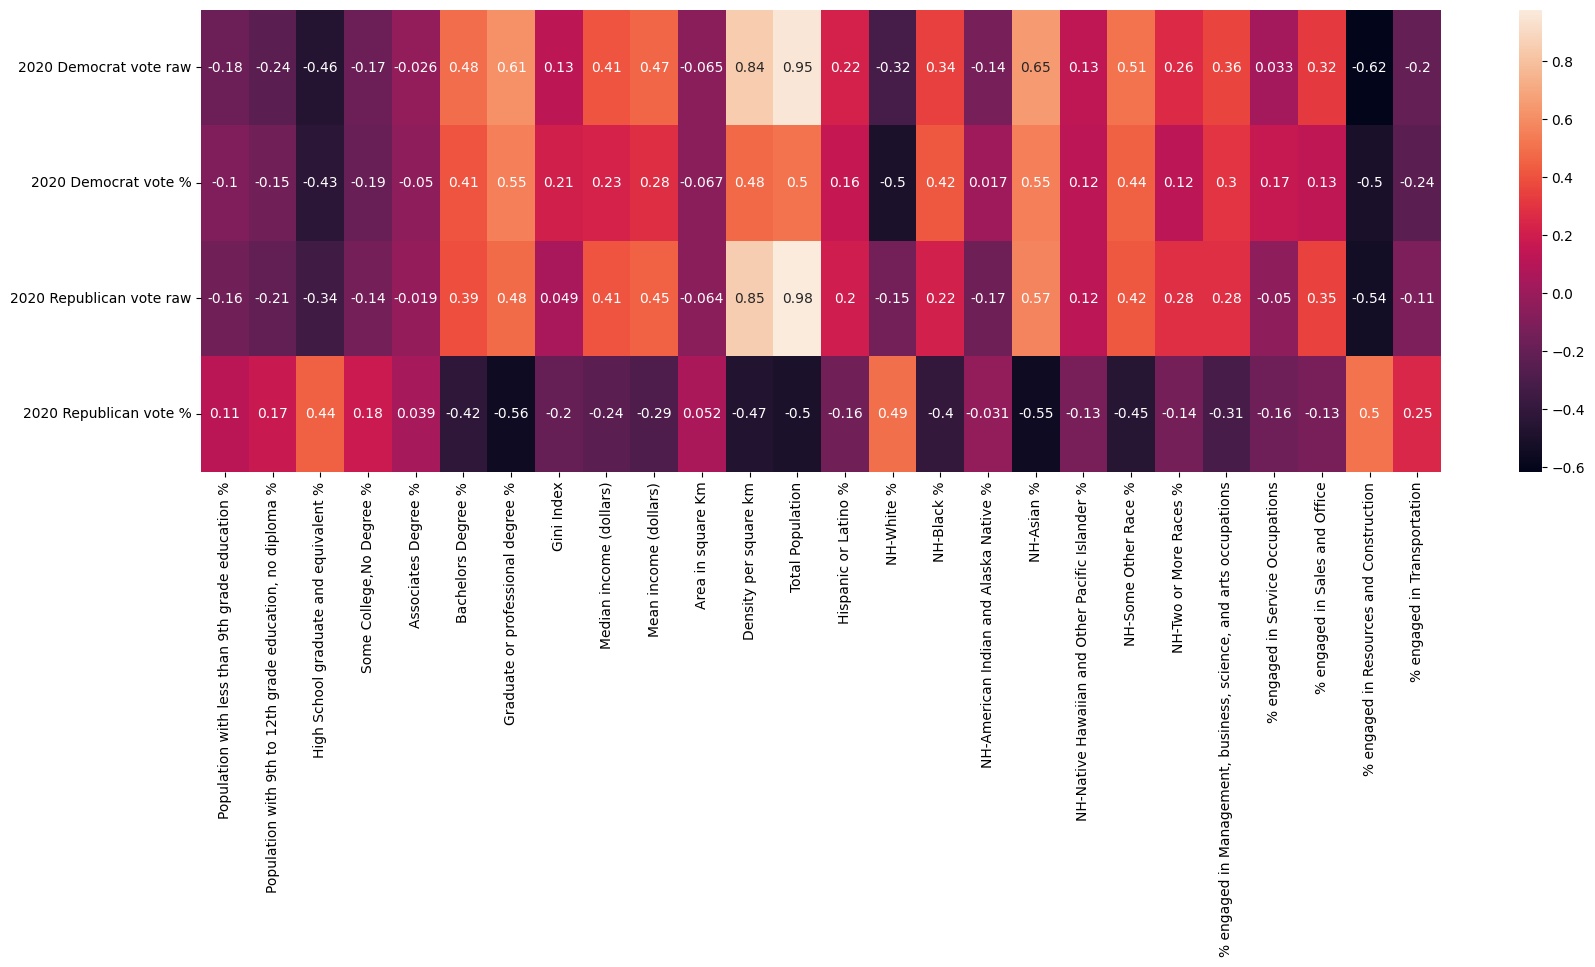

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# For columns I want to see
x_columns = ['2020 Democrat vote raw', '2020 Democrat vote %',
       '2020 Republican vote raw', '2020 Republican vote %',]
# For columns I want to compare to
y_columns = ['Population with less than 9th grade education %',
       'Population with 9th to 12th grade education, no diploma %',
       'High School graduate and equivalent %', 'Some College,No Degree %',
       'Associates Degree %', 'Bachelors Degree %',
       'Graduate or professional degree %', 'Gini Index',
       'Median income (dollars)', 'Mean income (dollars)', 'Area in square Km',
       'Density per square km', 'Total Population','Hispanic or Latino %',
       'NH-White %', 'NH-Black %', 'NH-American Indian and Alaska Native %',
       'NH-Asian %', 'NH-Native Hawaiian and Other Pacific Islander %',
       'NH-Some Other Race %', 'NH-Two or More Races %',
       '% engaged in Management, business, science, and arts occupations',
       '% engaged in Service Occupations', '% engaged in Sales and Office',
       '% engaged in Resources and Construction',
       '% engaged in Transportation']

corr_matrix = df.corr(numeric_only=True)
corr_matrix = corr_matrix.loc[x_columns, y_columns]
plt.figure(figsize=(20, 6))
sns.heatmap(corr_matrix, annot=True)

f, 2 points plus shot at lightning talk) Look over your findings from parts (a-e) and summarize anything interesting you learned about the data from doing this study.  The students with the best answers to this question (who also chose to analyze novel datasets) may be selected to give lightning talks for additional extra credit.

Summary of findings:

From my random forest regressor:
*   Having a graduate or professional degree is most indicative of voting tendencies
*   Race is a huge factor for vote percentages. However, races with less people within the US such as Pacific Islander contributed far less to the regressor than other races such as White and Black.
*  Financial factors such as median income and gini index scored low on feature importance. This means it might not be as big a factor as other factors like education and race.

From my seaborn heatmap:
*   Education tends to have a high correlation with voting tendencies. The more advanced education a person has, the more likely they are to vote democrat and vice versa. That is why people with high school degrees lean republican and college degrees lean democrat.
*   White people lean far more republican. Outside of that, every other minority race leans democrat.
*  People who are in white collar jobs like office jobs and management lean democrat. Blue collar jobs lean republican. This can say a bit about the parties themselves and who they appeal to.
* Population density and income correlate positively, so more population and more income correlate with democrats and vice versa.





